In [130]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.optimize import curve_fit


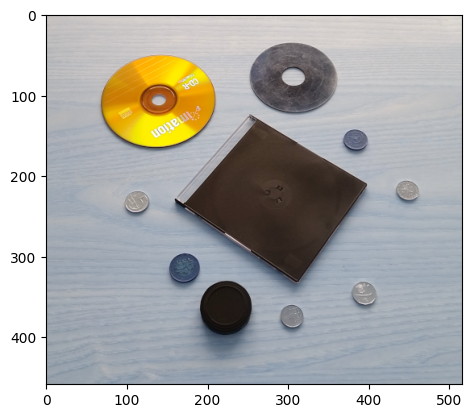

In [131]:
image=cv2.imread(".\Data\cd_box.png")
plt.imshow(image)

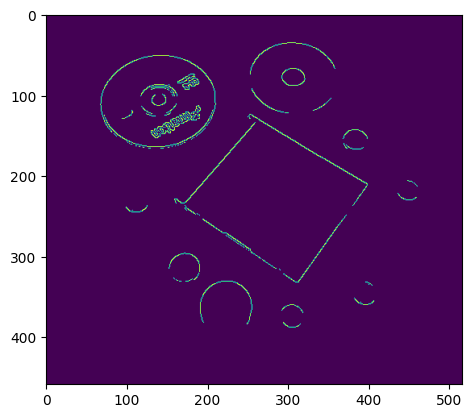

In [132]:
edges=cv2.Canny(image,350,400)
plt.imshow(edges)

In [133]:
edge_positions=cv2.findNonZero(edges)
edge_positions=np.reshape(edge_positions,(edge_positions.shape[0],edge_positions.shape[2]))
edge_positions.shape

(2968, 2)

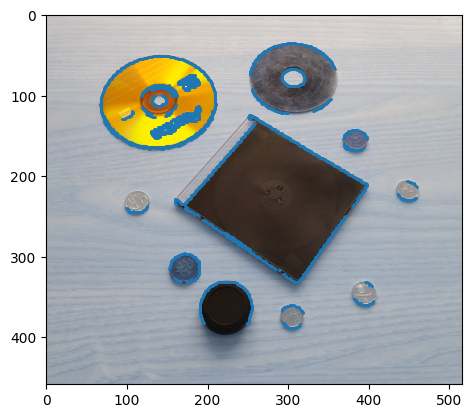

In [134]:
plt.imshow(image)
plt.plot(edge_positions[:,0],edge_positions[:,1],'o',markersize=1)

In [135]:
class LinearModel:
    def __init__(self,a:float=0,b:float=0):
        self.a=a
        self.b=b

    def fit(self,data:np.array):
        popt,pcov=curve_fit(lambda x,a,b:a*x+b,data[:,0],data[:,1])
        self.a=popt[0]
        self.b=popt[1]

    def loss(self,y_true:np.array):
        y_pred=self.a*y_true[:,0]+self.b
        return (y_true[:,1]-y_pred)**2
    
    def metric(self,y_true:np.array):
        return np.sum(self.loss(y_true))/y_true.shape[0]


In [136]:

def RANSAC(n:int,max_iter:int,eps:float,min_inliers:int):
    iterations=0
    model_error=10000
    final_inliers=None
    best_model=None
    model=LinearModel()
    while iterations<max_iter:
        indices=np.random.choice(edge_positions.shape[0],n,False)
        points_to_fit=edge_positions[indices]
        model.fit(points_to_fit)
        loss_per_datapoint=model.loss(edge_positions)
        inliers=edge_positions[loss_per_datapoint<eps]
        if inliers.shape[0]>min_inliers:
            inlier_model=LinearModel()
            inlier_model.fit(inliers)
            inlier_error=inlier_model.metric(inliers)
            if inlier_error<model_error:
                model_error=inlier_error
                final_inliers=inliers
                best_model=inlier_model
        iterations+=1
    return final_inliers,best_model

In [137]:

lines=[]
for i in range(4):
    pixels_on_line,model=RANSAC(2,2000,3,150)
    lines.append(model)
    indices_to_remove=[]
    print(pixels_on_line.shape)
    for element in pixels_on_line:
        indices=np.where((edge_positions==(element[0],element[1])).all(axis=1))[0][0]
        #print(element,indices)
        indices_to_remove.append(indices)
    print(indices_to_remove)
    print(edge_positions.shape)
    edge_positions=np.delete(edge_positions,indices_to_remove,axis=0)   
    print(edge_positions.shape)

(214, 2)
[99, 100, 101, 102, 103, 104, 362, 372, 384, 385, 386, 398, 399, 413, 414, 428, 445, 446, 447, 463, 464, 480, 481, 502, 516, 717, 728, 736, 1056, 1057, 1058, 1084, 1085, 1111, 1112, 1129, 1130, 1131, 1151, 1152, 1153, 1179, 1180, 1199, 1200, 1222, 1223, 1239, 1240, 1241, 1253, 1254, 1255, 1272, 1273, 1291, 1292, 1293, 1310, 1311, 1312, 1332, 1333, 1349, 1350, 1351, 1375, 1376, 1377, 1392, 1393, 1409, 1410, 1411, 1430, 1431, 1432, 1453, 1454, 1486, 1487, 1488, 1516, 1517, 1540, 1541, 1542, 1565, 1566, 1567, 1590, 1591, 1609, 1610, 1611, 1631, 1632, 1633, 1650, 1651, 1652, 1667, 1668, 1683, 1684, 1685, 1697, 1698, 1708, 1709, 1710, 1719, 1720, 1721, 1731, 1732, 1733, 1742, 1743, 1754, 1755, 1756, 1767, 1768, 1784, 1785, 1786, 1800, 1801, 1820, 1821, 1822, 1853, 1854, 1855, 1865, 1866, 1881, 1882, 1883, 1893, 1894, 1895, 1909, 1910, 1913, 1914, 1915, 1917, 1918, 1919, 1922, 1923, 1926, 1927, 1928, 1931, 1932, 1933, 1936, 1937, 1940, 1941, 1942, 1945, 1946, 1947, 1950, 1951, 1952,

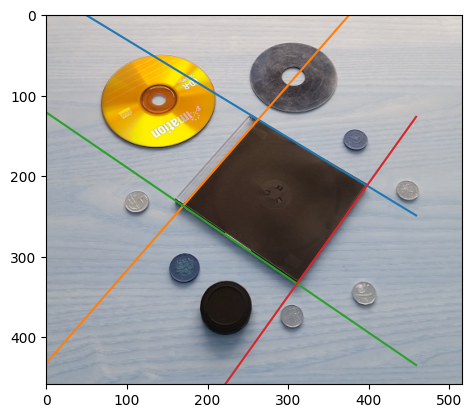

In [138]:
x=np.linspace(0,image.shape[0],image.shape[0])
for line in lines:
    plt.plot(x,line.a*x+line.b)
plt.imshow(image)


In [139]:
arr=np.array([0,1,2,3,4,5,5,6])
np.where(arr==5)[0]

array([5, 6], dtype=int64)